<a href="https://colab.research.google.com/github/adityamishra5050/MNIST-neural-network-from-scratch/blob/main/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
'''
The model architecture should satisfy the following conditions:
1. Number of neurons in the output layer: Equal to the number of classes
2. Activation function: Sigmoid (except in the output layer); Softmax in the output layer
3. Optimization algorithm: Gradient Descent (to be coded from scratch; you may use the code from
previous assignments)
4. Weight initialization: Random
5. Loss function: Categorical Crossentropy
6. Evaluation metrics: Accuracy
7. Train-test split: Standard protocol
'''

'\nThe model architecture should satisfy the following conditions:\n1. Number of neurons in the output layer: Equal to the number of classes\n2. Activation function: Sigmoid (except in the output layer); Softmax in the output layer\n3. Optimization algorithm: Gradient Descent (to be coded from scratch; you may use the code from\nprevious assignments)\n4. Weight initialization: Random\n5. Loss function: Categorical Crossentropy\n6. Evaluation metrics: Accuracy\n7. Train-test split: Standard protocol\n'

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/mnist_train.csv',header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/mnist_test.csv',header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.rename(columns = {0:'col_1_train'}, inplace = True)
test_data.rename(columns = {0:'col_1_test'}, inplace = True)

In [ ]:
# Set up the data
y_train=train_data['col_1_train'].values
X_train = train_data.drop(columns=['col_1_train']).values/255
y_test=test_data['col_1_test'].values
X_test = test_data.drop(columns=['col_1_test']).values/255

In [ ]:
# sigmoid activation function
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [ ]:
def hid_fun(input_data,Weight1,bias1):
    '''
    Layer_1 = input layer , Layer_2 = hidden layer, with a size implied by the arguments Weight[0], bias , Layer_3 = output layer, with Weight[1]
    '''
    # passing the input layer
    input1 = input_data
    # layer_1 to layer_2
    output1 = np.matmul(input_data, Weight1[0]) + bias1[0]

    input2 = sigmoid(output1)
    # layer_2 to layer_3
    output2 = np.matmul(input2, Weight1[1])
    expo_s1 = np.exp(output2)
    total = np.sum(expo_s1, axis=1).reshape(-1,1)
    result_expo = expo_s1/total
    # this is the probability of each data sample given in the data det impleted by the above operations
    return result_expo

In [ ]:
def softmax(input_data1,weight3):

    expo_s2 = np.exp(np.matmul(input_data1,weight3))
    total = np.sum(expo_s2, axis=1).reshape(-1,1)
    return expo_s2 / total

In [ ]:
def cross_loss(pred_value,given_value):
    '''
    K is the number of classes which should be the globel variable for the furthur operations
    '''
    global K
    K = 10
    N = len(given_value)
    given_value_one_hot_vec = (given_value[:,np.newaxis] == np.arange(K))
    loss_data = (np.log(pred_value) * given_value_one_hot_vec).sum(axis=1)
    return -np.mean(loss_data)

In [ ]:
def backprop(Weight2,bias2,input_data2,y_train_data,regu_factor=1e-4):
    '''
    Step 1: implement forward propogation hid_fun(input_data,Weight1,bias1)
    Step 2: implement backpropagation for dWeight and dbias
    '''
    K = 10
    N = input_data2.shape[0]

    # passing the input layer
    input1 = input_data2
    # layer_1 to layer_2
    output1 = np.matmul(input_data2, Weight2[0]) + bias2[0]
    # layer_2 activation
    input2 = sigmoid(output1)


    # layer_2 to layer_3
    output2 = np.matmul(input2, Weight2[1])
    expo_s3 = np.exp(output2)
    total = np.sum(expo_s3, axis=1).reshape(-1,1)
    result_expo1 = expo_s3/total


    # layer_2 to layer_3 weights' derivative
    # parti_2 is \partial L/partial output2, of shape (N,K)
    y_train_data_hot_vec = (y_train_data[:,np.newaxis] == np.arange(K))
    parti_2 = (result_expo1 - y_train_data_hot_vec)
    grad_Weight1 = np.matmul(input2.T, parti_2)

    # layer_1 to layer_2 weights' derivative
    # parti_1 is \partial a2/partial output1

    parti_1 = np.matmul(parti_2, Weight2[1].T)*(output1>0)
    grad_Weight0 = np.matmul(input_data2.T, parti_1)



    dWeight = [grad_Weight0/N + regu_factor*Weight2[0], grad_Weight1/N + regu_factor*Weight2[1]]
    dbias = [np.mean(parti_1, axis=0)]
    # dWeight[0] is Weight[0]'s derivative, and dWeight[1] is Weight[1]'s derivative; similar for dbias
    return dWeight, dbias

In [ ]:
'''
Use this dataset, train the model and report the results (configuration parameters, weights & biases
learned, accuracy) in a .txt file, for the following configurations:
1. N = size of the input; H = 10; η = 0.01; E = 20
2. N = size of the input; H = 10; η= 0.1; E = 50
3. N = size of the input; H = 20; η = 0.02; E = 50
4. N = size of the input; H = 2; η = 0.01; E = 10
5. N = size of the input; H = 4; η= 0.5; E = 25
'''

'\nUse this dataset, train the model and report the results (configuration parameters, weights & biases\nlearned, accuracy) in a .txt file, for the following configurations:\n1. N = size of the input; H = 10; η = 0.01; E = 20\n2. N = size of the input; H = 10; η= 0.1; E = 50\n3. N = size of the input; H = 20; η = 0.02; E = 50\n4. N = size of the input; H = 2; η = 0.01; E = 10\n5. N = size of the input; H = 4; η= 0.5; E = 25\n'

In [ ]:
chii = 5e-1
regu_factor1 = 1e-6 # regularization factor 1
learn_rate0 = 0.01 # learning rate η
eps = 1e-3 #epsilon
Epoch0 = 20 # number of Epoch
n_H0 = 10 # number of nodes in the hidden layer
n = X_train.shape[1] # number of input feature or size of input
K = 10

In [ ]:
learn_rate1 = 0.1 # learning rate η
Epoch1 = 50 # number of Epoch
n_H1 = 10 # number of nodes in the hidden layer

In [ ]:
learn_rate2 = 0.02 # learning rate η
Epoch2 = 50 # number of Epoch
n_H2 = 20 # number of nodes in the hidden layer

In [ ]:
learn_rate3 = 0.01 # learning rate η
Epoch3 = 10 # number of Epoch
n_H3 = 2 # number of nodes in the hidden layer

In [ ]:
learn_rate4 = 0.5 # learning rate η
Epoch4 = 25 # number of Epoch
n_H4 = 4 # number of nodes in the hidden layer

In [ ]:
# initialization
np.random.seed(1127)
random_Weight0 = [1e-1*np.random.randn(n, n_H0), 1e-1*np.random.randn(n_H0, K)]
random_bias0 = [np.random.randn(n_H0)]
results0 = pd.DataFrame(columns=["Loss", "accuracy"])

In [ ]:
# initialization
np.random.seed(1127)
random_Weight1 = [1e-1*np.random.randn(n, n_H1), 1e-1*np.random.randn(n_H1, K)]
random_bias1 = [np.random.randn(n_H1)]
results1 = pd.DataFrame(columns=["Loss", "accuracy"])

In [ ]:
# initialization
np.random.seed(1127)
random_Weight2 = [1e-1*np.random.randn(n, n_H2), 1e-1*np.random.randn(n_H2, K)]
random_bias2 = [np.random.randn(n_H2)]
results2 = pd.DataFrame(columns=["Loss", "accuracy"])

In [ ]:
# initialization
np.random.seed(1127)
random_Weight3 = [1e-1*np.random.randn(n, n_H3), 1e-1*np.random.randn(n_H3, K)]
random_bias3 = [np.random.randn(n_H3)]
results3 = pd.DataFrame(columns=["Loss", "accuracy"])

In [ ]:
# initialization
np.random.seed(1127)
random_Weight4 = [1e-1*np.random.randn(n, n_H4), 1e-1*np.random.randn(n_H4, K)]
random_bias4 = [np.random.randn(n_H4)]
results4 = pd.DataFrame(columns=["Loss", "accuracy"])

In [ ]:
%%time
gWeight00= gWeight10 = gbias00 = 1

for i in range(Epoch0):
    dWeight0, dbias0 = backprop(random_Weight0,random_bias0,X_train,y_train,regu_factor1)

    gWeight00 = learn_rate0*gWeight00 + (1-learn_rate0)*np.sum(dWeight0[0]**2)
    chiiWeight00 = chii/np.sqrt(gWeight00 + eps)
    random_Weight0[0] -= chiiWeight00 * dWeight0[0]

    gWeight10 = learn_rate0*gWeight10 + (1-learn_rate0)*np.sum(dWeight0[1]**2)
    chiiWeight10 = chii/np.sqrt(gWeight10 + eps)
    random_Weight0[1] -= chiiWeight10 * dWeight0[1]

    gbias00 = learn_rate0*gbias00 + (1-learn_rate0)*np.sum(dbias0[0]**2)
    chiibias00 = chii/np.sqrt(gbias00 + eps)
    random_bias0[0] -= chiibias00 * dbias0[0]

    y_pred10=hid_fun(X_train,random_Weight0,random_bias0)
    results0=results0.append({"Loss":cross_loss(y_pred10,y_train), "accuracy":np.mean(np.argmax(y_pred10, axis=1)== y_train)},ignore_index=True )

    if i % 20 == 0:
        # sanity check 1
        y_pred = hid_fun(X_train,random_Weight0,random_bias0)

        # reset RMSprop
        gWeight00 = gWeight10 = gbias00 = 1



y_pred_final0 = hid_fun(X_train,random_Weight0,random_bias0)
print("Final cross-entropy loss is {}".format(cross_loss(y_pred_final0,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final0, axis=1)== y_train)))
print("Final weights {}".format(random_Weight0))
print("Final bias {}".format(random_bias0))

<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from panda

Final cross-entropy loss is 1.8401189597365546
Final training accuracy is 39.4483%
Final weights [array([[ 0.01047774, -0.03497942,  0.07490243, ..., -0.11258829,
        -0.11336679,  0.10423842],
       [ 0.17762452,  0.15703485,  0.02872612, ...,  0.04326344,
         0.00987298,  0.05634156],
       [-0.01462666,  0.04048156,  0.00232117, ..., -0.02078763,
         0.06673747, -0.1896825 ],
       ...,
       [ 0.10721471,  0.02214582, -0.02287042, ...,  0.01222348,
        -0.12677585, -0.15678878],
       [ 0.14139493, -0.21084321, -0.02705917, ...,  0.03158553,
         0.03358383, -0.06653114],
       [ 0.04035171,  0.13121643, -0.12682419, ...,  0.01189589,
        -0.12526948, -0.16920682]]), array([[-1.32989493e+00,  5.44848894e-01, -2.59844670e-01,
        -4.62621286e-01,  5.78266763e-01, -1.91079448e-01,
        -2.90976363e-01,  6.80819793e-01,  5.29197808e-03,
         4.84433136e-01],
       [ 6.67243123e-01, -3.86637205e-01,  6.84617487e-02,
        -9.56469311e-01,  

In [ ]:
%%time
gWeight01 = gWeight11 = gbias01 = 1

for i in range(Epoch1):
    dWeight1, dbias1 = backprop(random_Weight1,random_bias1,X_train,y_train,regu_factor1)

    gWeight01 = learn_rate1*gWeight01 + (1-learn_rate1)*np.sum(dWeight1[0]**2)
    chiiWeight01 = chii/np.sqrt(gWeight01 + eps)
    random_Weight1[0] -= chiiWeight01 * dWeight1[0]

    gWeight11 = learn_rate1*gWeight11 + (1-learn_rate1)*np.sum(dWeight1[1]**2)
    chiiWeight11 = chii/np.sqrt(gWeight11 + eps)
    random_Weight1[1] -= chiiWeight11 * dWeight1[1]

    gbias01 = learn_rate1*gbias01 + (1-learn_rate1)*np.sum(dbias1[0]**2)
    chiibias01 = chii/np.sqrt(gbias01 + eps)
    random_bias1[0] -= chiibias01 * dbias1[0]

    y_pred11=hid_fun(X_train,random_Weight1,random_bias1)
    results1=results1.append({"Loss":cross_loss(y_pred11,y_train), "accuracy":np.mean(np.argmax(y_pred11, axis=1)== y_train)},ignore_index=True )

    if i % 50 == 0:
        # sanity check 1
        y_pred1 = hid_fun(X_train,random_Weight1,random_bias1)

        # reset RMSprop
        gWeight01 = gWeight11 = gbias01 = 1



y_pred_final1 = hid_fun(X_train,random_Weight1,random_bias1)
print("Final cross-entropy loss is {}".format(cross_loss(y_pred_final1,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final1, axis=1)== y_train)))
print("Final weights {}".format(random_Weight1))
print("Final bias {}".format(random_bias1))

<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from panda

Final cross-entropy loss is 1.5247116187296101
Final training accuracy is 51.3033%
Final weights [array([[ 0.01047765, -0.03497915,  0.07490183, ..., -0.11258739,
        -0.11336588,  0.10423759],
       [ 0.17762311,  0.1570336 ,  0.02872589, ...,  0.0432631 ,
         0.0098729 ,  0.05634111],
       [-0.01462654,  0.04048124,  0.00232115, ..., -0.02078746,
         0.06673694, -0.18968099],
       ...,
       [ 0.10721386,  0.02214564, -0.02287024, ...,  0.01222338,
        -0.12677485, -0.15678753],
       [ 0.1413938 , -0.21084154, -0.02705896, ...,  0.03158528,
         0.03358356, -0.06653061],
       [ 0.04035139,  0.13121538, -0.12682319, ...,  0.0118958 ,
        -0.12526848, -0.16920547]]), array([[-2.09941872e+00,  1.00694902e+00, -2.50130013e-01,
        -1.32159117e+00,  9.34036384e-01, -6.57614601e-01,
         1.66906433e-02,  1.12219708e+00,  1.66286394e-01,
         8.41854699e-01],
       [ 1.13614546e+00, -1.37814257e+00,  4.31529435e-03,
        -1.54734816e+00,  

In [ ]:
%%time
gWeight02 = gWeight12 = gbias02 = 1

for i in range(Epoch2):
    dWeight2, dbias2 = backprop(random_Weight2,random_bias2,X_train,y_train,regu_factor1)

    gWeight02 = learn_rate2*gWeight02 + (1-learn_rate2)*np.sum(dWeight2[0]**2)
    chiiWeight02 = chii/np.sqrt(gWeight02 + eps)
    random_Weight2[0] -= chiiWeight02 * dWeight2[0]

    gWeight12 = learn_rate2*gWeight12 + (1-learn_rate2)*np.sum(dWeight2[1]**2)
    chiiWeight12 = chii/np.sqrt(gWeight12 + eps)
    random_Weight2[1] -= chiiWeight12 * dWeight2[1]

    gbias02 = learn_rate2*gbias02 + (1-learn_rate2)*np.sum(dbias2[0]**2)
    chiibias02 = chii/np.sqrt(gbias02 + eps)
    random_bias2[0] -= chiibias02 * dbias2[0]

    y_pred12=hid_fun(X_train,random_Weight2,random_bias2)
    results2=results2.append({"Loss":cross_loss(y_pred12,y_train), "accuracy":np.mean(np.argmax(y_pred12, axis=1)== y_train)},ignore_index=True )


    if i % 50 == 0:
        # sanity check 1
        y_pred2 = hid_fun(X_train,random_Weight2,random_bias2)

        # reset RMSprop
        gWeight02 = gWeight12 = gbias02 = 1



y_pred_final2 = hid_fun(X_train,random_Weight2,random_bias2)
print("Final cross-entropy loss is {}".format(cross_loss(y_pred_final2,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final2, axis=1)== y_train)))
print("Final weights {}".format(random_Weight2))
print("Final bias {}".format(random_bias2))

<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from panda

Final cross-entropy loss is 1.4103661621780947
Final training accuracy is 54.4450%
Final weights [array([[ 0.01047766, -0.03497916,  0.07490187, ...,  0.04326312,
         0.0098729 ,  0.05634114],
       [-0.01462655,  0.04048126,  0.00232115, ...,  0.08699702,
         0.02857695,  0.14570814],
       [-0.17653462,  0.13433922,  0.0566632 , ..., -0.0473962 ,
        -0.15237075,  0.03764625],
       ...,
       [-0.05231621,  0.03564897,  0.00741721, ...,  0.20788761,
         0.12483375,  0.06610956],
       [ 0.0932041 ,  0.06795018,  0.20922209, ..., -0.05887238,
         0.04325061,  0.08776613],
       [ 0.10298775, -0.01015612, -0.14619422, ...,  0.08946996,
         0.0106928 , -0.03114977]]), array([[ 0.48753148, -0.16059492,  0.6837367 ,  0.22050668,  0.15281011,
        -0.30806854,  0.32236552, -1.07695734, -0.01882841, -0.34137779],
       [ 0.39918925, -1.57713136,  0.3838315 ,  0.2982328 ,  0.44755837,
         0.1246656 ,  0.40807572, -0.53423768, -0.15752708, -0.02493

In [ ]:
%%time
gWeight03 = gWeight13 = gbias03 = 1

for i in range(Epoch3):
    dWeight3, dbias3 = backprop(random_Weight3,random_bias3,X_train,y_train,regu_factor1)

    gWeight03= learn_rate3*gWeight03 + (1-learn_rate3)*np.sum(dWeight3[0]**2)
    chiiWeight03 = chii/np.sqrt(gWeight03 + eps)
    random_Weight3[0] -= chiiWeight03 * dWeight3[0]

    gWeight13 = learn_rate3*gWeight13 + (1-learn_rate3)*np.sum(dWeight3[1]**2)
    chiiWeight13 = chii/np.sqrt(gWeight13 + eps)
    random_Weight3[1] -= chiiWeight13 * dWeight3[1]

    gbias03 = learn_rate3*gbias03 + (1-learn_rate3)*np.sum(dbias3[0]**2)
    chiibias03 = chii/np.sqrt(gbias03 + eps)
    random_bias3[0] -= chiibias03 * dbias3[0]

    y_pred13=hid_fun(X_train,random_Weight3,random_bias3)
    results3=results3.append({"Loss":cross_loss(y_pred13,y_train), "accuracy":np.mean(np.argmax(y_pred13, axis=1)== y_train)},ignore_index=True )

    if i % 10 == 0:
        # sanity check 1
        y_pred3 = hid_fun(X_train,random_Weight3,random_bias3)

        # reset RMSprop
        gWeight03 = gWeight13 = gbias03 = 1



y_pred_final3 = hid_fun(X_train,random_Weight3,random_bias3)
print("Final cross-entropy loss is {}".format(cross_loss(y_pred_final3,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final3, axis=1)== y_train)))
print("Final weights {}".format(random_Weight3))
print("Final bias {}".format(random_bias3))

<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from panda

Final cross-entropy loss is 2.278372083770532
Final training accuracy is 10.7050%
Final weights [array([[ 0.01047762, -0.03497903],
       [ 0.07490159, -0.15563367],
       [ 0.03432253,  0.12535123],
       ...,
       [-0.06896973, -0.01974851],
       [ 0.05295507,  0.12795445],
       [-0.12726889,  0.11725652]]), array([[-0.16047416,  0.34332718, -0.03323708,  0.15016973, -0.07320794,
         0.10799531, -0.24024832, -0.03521533,  0.05104841, -0.08439243],
       [-0.27031956, -0.05964883, -0.31865065, -0.62303164,  0.45808619,
        -0.18348826,  0.27074788,  0.53649108, -0.13031829,  0.47482719]])]
Final bias [array([-2.47064967,  1.02831272])]
CPU times: user 9.26 s, sys: 1.55 s, total: 10.8 s
Wall time: 8.91 s


In [ ]:
%%time
gWeight04 = gWeight14 = gbias04 = 1

for i in range(Epoch4):
    dWeight4, dbias4 = backprop(random_Weight4,random_bias4,X_train,y_train,regu_factor1)

    gWeight04= learn_rate4*gWeight04 + (1-learn_rate4)*np.sum(dWeight4[0]**2)
    chiiWeight04 = chii/np.sqrt(gWeight04 + eps)
    random_Weight4[0] -= chiiWeight04 * dWeight4[0]

    gWeight14 = learn_rate4*gWeight14 + (1-learn_rate4)*np.sum(dWeight4[1]**2)
    chiiWeight14 = chii/np.sqrt(gWeight14 + eps)
    random_Weight4[1] -= chiiWeight14 * dWeight4[1]

    gbias04 = learn_rate4*gbias04 + (1-learn_rate4)*np.sum(dbias4[0]**2)
    chiibias04 = chii/np.sqrt(gbias04 + eps)
    random_bias4[0] -= chiibias04 * dbias4[0]

    y_pred14=hid_fun(X_train,random_Weight4,random_bias4)
    results4=results4.append({"Loss":cross_loss(y_pred14,y_train), "accuracy":np.mean(np.argmax(y_pred14, axis=1)== y_train)},ignore_index=True )

    if i % 25 == 0:
        # sanity check 1
        y_pred4 = hid_fun(X_train,random_Weight4,random_bias4)

        # reset RMSprop
        gWeight04 = gWeight14 = gbias04 = 1



y_pred_final4 = hid_fun(X_train,random_Weight4,random_bias4)
print("Final cross-entropy loss is {}".format(cross_loss(y_pred_final4,y_train)))
print("Final training accuracy is {:.4%}".format(np.mean(np.argmax(y_pred_final4, axis=1)== y_train)))
print("Final weights {}".format(random_Weight4))
print("Final bias {}".format(random_bias4))

<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<timed exec>:19: FutureWarning: The frame.append method is deprecated and will be removed from panda

Final cross-entropy loss is 1.9311240527475535
Final training accuracy is 34.1750%
Final weights [array([[ 0.01047766, -0.03497917,  0.07490188, -0.15563428],
       [ 0.03432266,  0.12535172, -0.02919712, -0.11258746],
       [-0.11336596,  0.10423766,  0.17762323,  0.1570337 ],
       ...,
       [ 0.2169142 ,  0.00401347,  0.20440601, -0.26034339],
       [-0.12778422, -0.06260239, -0.00956542,  0.00765831],
       [ 0.05599097, -0.02084014, -0.03158732, -0.06251432]]), array([[ 0.89781668, -0.04312743,  0.42636573,  0.1045413 , -0.1649027 ,
         0.12578984,  0.66024362, -1.34976832,  0.05869519, -0.87604105],
       [ 0.43050846,  1.34954567,  0.38583898,  0.5840224 , -1.35933564,
         0.38369391,  0.37567256, -1.60296223,  0.27116604, -0.73313941],
       [-1.96415443,  0.89220282, -0.1510401 ,  0.45455616,  0.49767599,
        -0.31394353, -1.888343  ,  1.43316969,  0.19720054,  0.88057536],
       [ 0.39535639, -2.36062422, -0.55256909, -1.01642839,  1.06455406,
        

<Axes: title={'center': 'Cross Entropy Loss vs Loss'}, xlabel='Epoch', ylabel='Cross Entropy Loss'>

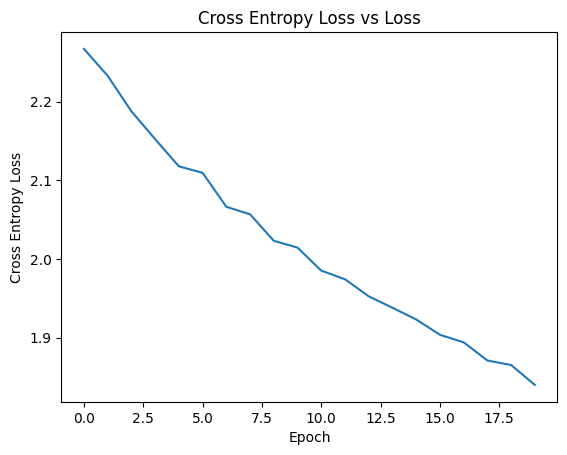

In [ ]:
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
results0.Loss.plot(title="Cross Entropy Loss vs Loss",)

<Axes: title={'center': 'Accuracy Vs Epoch'}, xlabel='Epoch', ylabel='Accuracy'>

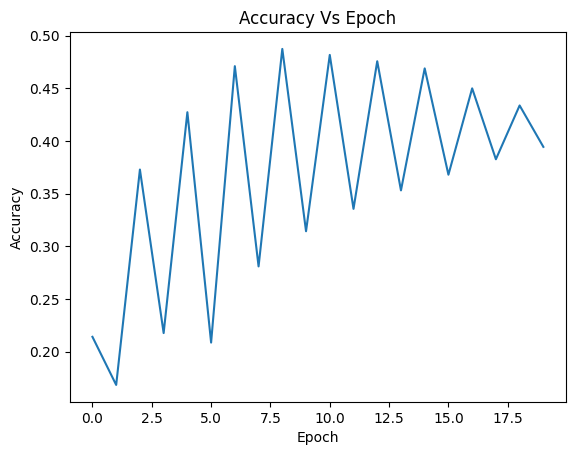

In [ ]:
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
results0.accuracy.plot(title="Accuracy Vs Epoch")

<Axes: title={'center': 'Cross Entropy Loss vs Loss'}, xlabel='Epoch', ylabel='Cross Entropy Loss'>

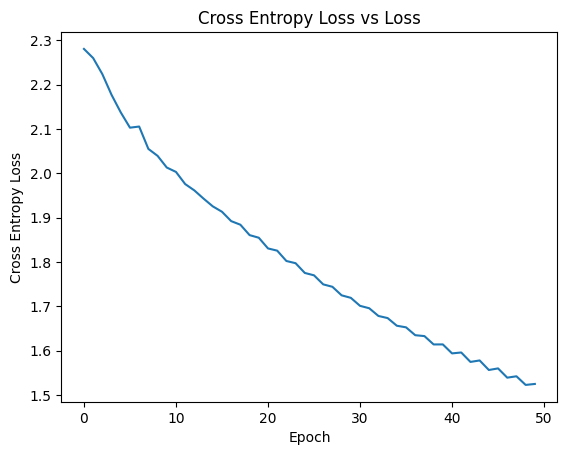

In [ ]:
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
results1.Loss.plot(title="Cross Entropy Loss vs Loss",)

<Axes: title={'center': 'Accuracy Vs Epoch'}, xlabel='Epoch', ylabel='Accuracy'>

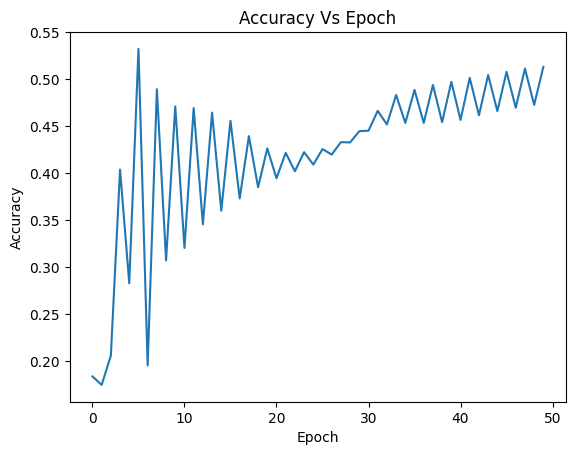

In [ ]:
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
results1.accuracy.plot(title="Accuracy Vs Epoch")

<Axes: title={'center': 'Cross Entropy Loss vs Loss'}, xlabel='Epoch', ylabel='Cross Entropy Loss'>

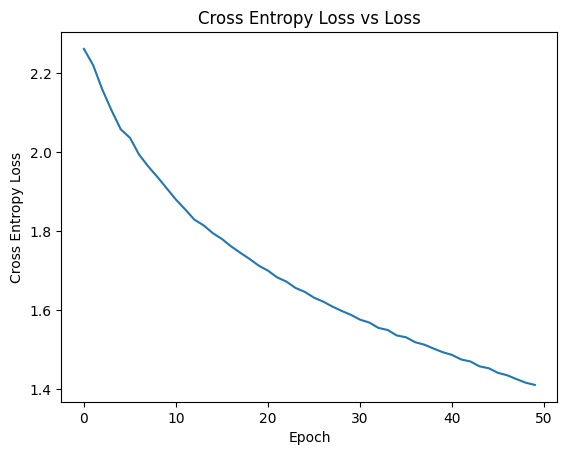

In [ ]:
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
results2.Loss.plot(title="Cross Entropy Loss vs Loss",)

<Axes: title={'center': 'Accuracy Vs Epoch'}, xlabel='Epoch', ylabel='Accuracy'>

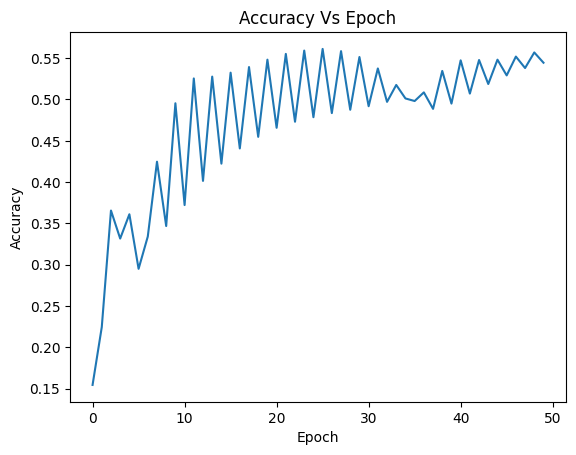

In [ ]:
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
results2.accuracy.plot(title="Accuracy Vs Epoch")

<Axes: title={'center': 'Cross Entropy Loss vs Loss'}, xlabel='Epoch', ylabel='Cross Entropy Loss'>

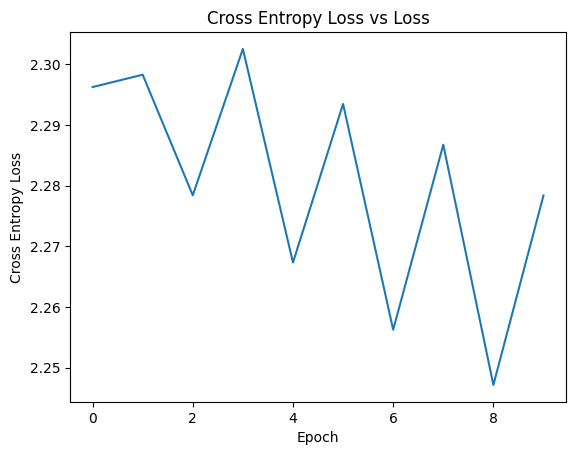

In [ ]:
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
results3.Loss.plot(title="Cross Entropy Loss vs Loss",)

<Axes: title={'center': 'Accuracy Vs Epoch'}, xlabel='Epoch', ylabel='Accuracy'>

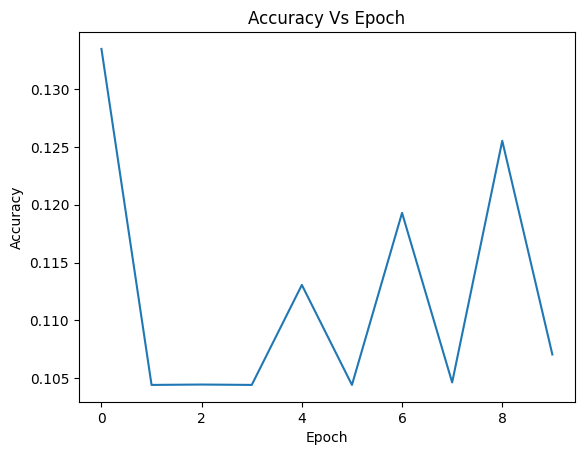

In [ ]:
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
results3.accuracy.plot(title="Accuracy Vs Epoch")

<Axes: title={'center': 'Cross Entropy Loss vs Loss'}, xlabel='Epoch', ylabel='Cross Entropy Loss'>

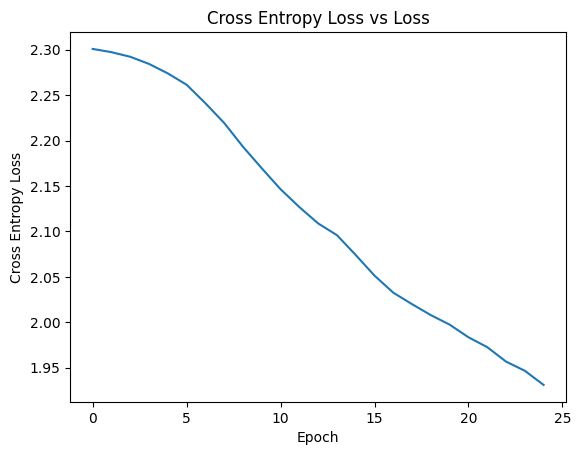

In [ ]:
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
results4.Loss.plot(title="Cross Entropy Loss vs Loss",)

<Axes: title={'center': 'Accuracy Vs Epoch'}, xlabel='Epoch', ylabel='Accuracy'>

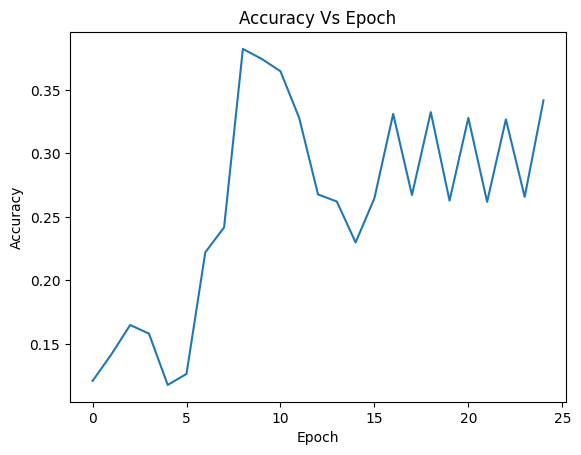

In [ ]:
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
results4.accuracy.plot(title="Accuracy Vs Epoch")